# Cálculo Numérico - 2021.2 - Tarefa 4 - Professor João Paixão
## Realizado por: David Rodrigues Albuquerque - 120047390
## Questões discutidas com: Beatriz Almeida Ramos, Carlos Bravo, Matheus Barroso

# Exercício 1.1.2

Para este exercício, utilizaremos a técnica do Método de Newton para calcular uma aproximação de ln(3) utilizando 20 passos do método.

Para isto, queremos uma função $f(x)$ tal que $f(ln(3)) = 0$. Como sabemos calcular $e^{x}$ para qualquer $x$ e sabemos as propriedades de $ln$, podemos utilizar a função $f(x) = 3 - e^{x}$.

Com isto, temos que

$$f(x) = 3 - e^{x}$$
$$f'(x) = -e^x$$

Assim, podemos utilizar o Método de Newton na forma

$$x = x_{init} - \dfrac{f(x_{init})}{f'(x_{init})} = x_{init} - \dfrac{3-e^{x_{init}}}{-e^{x_{init}}}$$

tal que $x$ é o número que queremos aproximar e $x_{init}$ é um chute inicial.

Com isto, podemos utilizar o algoritmo abaixo para realizar a aproximação.

In [3]:
# Exemplo de Metodo de Newton para achar ln(3)
function newton_ln_3(iteracoes, chute) # Número de iterações e chute inicial
    for i=1:iteracoes
        chute = chute - (3-(Base.MathConstants.e^chute))/(-Base.MathConstants.e^chute) # Chute - f(chute)/f'(chute)
    end
    return chute # Aproximação do resultado. Quanto mais iterações, maior a precisão.
end

newton_ln_3 (generic function with 1 method)

Passaremos então para função um número de passos $20$ e uma aproximação inicial $1$

In [4]:
newton_ln_3(20, 1)

1.0986122886681096

# Exercício 1.1.4



Para este exercício, utilizaremos a técnica da Interpolação Polinomial de Grau 1 para calcular uma aproximação de ln(3) e estimaremos o erro máximo. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de ln(3).

Podemos tirar uma aproximação da função logaritmica próxima de um polinômio de grau 1 utilizando valores triviais, isto é, $ln(1)$ e $ln(e)$, pois podem ser calculados usando apenas as propriedades de logaritmo. Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2})$ e que nos dará um polinômio na forma 
$$P = c_{1}x + c_{0}$$

$$
\begin{cases}
c_{1}x_{0} + c_{0} = y_{0} \\
c_{1}x_{1} + c_{0} = y_{1} \\
\end{cases}
$$

Usaremos então os pontos $(ln(1), 0),(ln(e),1)$. Portanto, temos que 

\begin{cases}
c_{1}ln(1) + c_{0} = 0 \\
c_{1}ln(e) + c_{0} = 1 \\
\end{cases}

Realizando as conversões necessárias para exp, temos que, com isto, podemos modelar as matrizes da seguinte forma

$$
V = \begin{bmatrix}
1 & 1  \\
1 & exp(1)  \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_ln3_grau1 descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 1.

In [97]:
function interpolacao_ln3_grau1()
    # Cria a matriz V
    x = [1; exp(1)]
    y = [0; 1]
    V=[x.^0 x.^1]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_ln3_grau1 (generic function with 1 method)

Com isto, podemos utilizar o método para achar os coeficientes da polinômio de grau 1 que nos dá uma aproximação da função original. Podemos então armazenar esses coeficientes, montar a função afim e calcular uma aproximação de ln(3) a partir desta função.

In [98]:
coefs = interpolacao_ln3_grau1()
c1 = coefs[2]
c0 = coefs[1]
f(x) = c1*x + c0
f(3)

1.163953413738653

Com isto, podemos agora também estipular o erro máximo na interpolação de grau 1, tal que este será dado por

$$\dfrac{f''(\epsilon)}{2!}(x - x_{0})(x - x_{1}) = f(\alpha) - p(\alpha) \leq \dfrac{M}{(2!)}*(x - x_{0})(x - x_{1})$$ 

para todo $\epsilon$ entre $x_{0} = 0$ e $x_{1} = 1$

# Exercício 1.1.5



Para este exercício, utilizaremos a técnica da Interpolação Polinomial de Grau 2 para calcular uma aproximação de ln(3) e estimaremos o erro máximo. Utilizaremos então um conjunto de pontos afim de montar o sistema de equações que resultará na matriz de Vandermonde para encontrarmos uma função aproximada que nos dará o valor de ln(3).

Podemos tirar uma aproximação da função logaritmica próxima de um polinômio de grau 2 utilizando valores triviais, isto é, $ln(1)$, $ln(e)$ e $ln(e^{2})$ pois podem ser calculados usando apenas as propriedades de logaritmo. Com isto, teremos uma função que passa pelos pontos $(x_{1},y_{1}),(x_{2},y_{2}), (x_{3},y_{3})$ e que nos dará um polinômio na forma 

$$P = c_{2}x^2 + c_{1}x + c_{0}$$

$$
\begin{cases}
c_{2}x_{0}^2 + c_{1}x_{0} + c_{0} = y_{0} \\
c_{2}x_{1}^2 + c_{1}x_{1} + c_{0} = y_{1} \\
c_{2}x_{2}^2 + c_{1}x_{2} + c_{0} = y_{2} \\
\end{cases}
$$

Usaremos então os pontos $(ln(1), 0),(ln(e),1)$ e $(ln(e^2), 2)$. Portanto, temos que 

\begin{cases}
c_{2}ln(1)^2 + c_{1}ln(1) + c_{0} = 0 \\
c_{2}ln(e)^2 + c_{1}ln(e) + c_{0} = 1 \\
c_{2}ln(e^2)^2 + c_{1}ln(e^2) + c_{0} = 2 \\
\end{cases}

Realizando as conversões necessárias para exp, temos que, com isto, podemos modelar as matrizes da seguinte forma

$$
V = \begin{bmatrix}
1 & 1 & 1^2  \\
1 & exp(1) & exp(1)^2 \\
1 & exp(2) & exp(2)^2 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
0 \\
1 \\
2 \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
c_{0} \\
c_{1} \\
c_{2} \\
\end{bmatrix}
$$

Devemos então resolver o sistema tal que $V \cdot c = y$. Vamos então utilizar o método interpolacao_ln3_grau2 descrito abaixo para resolver o sistema, retornando os coeficientes do polinômio de grau 2.

In [107]:
function interpolacao_ln3_grau2()
    # Cria a matriz V
    x = [1; exp(1); exp(2)]
    y = [0; 1; 2]
    V=[x.^0 x.^1 x.^2]
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_ln3_grau2 (generic function with 1 method)

Com isto, podemos utilizar o método para achar os coeficientes da polinômio de grau 2 que nos dá uma aproximação da função original. Podemos então armazenar esses coeficientes, montar a função quadrática e calcular uma aproximação de ln(3) a partir desta função.

In [108]:
coefs = interpolacao_ln3_grau2()
c2 = coefs[3]
c1 = coefs[2]
c0 = coefs[1]
f(x) = c2*x^2 + c1*x + c0
f(3)

1.1315109615486736

Com isto, podemos agora também estipular o erro máximo na interpolação de grau 2, tal que este será dado por

$$\dfrac{f'''(\epsilon)}{3!}(x - x_{0})(x - x_{1})(x - x_{2})$$ 

para todo $\epsilon$ entre $x_{0}$ e $x_{2}$

# Exercício 1.2)

Para este exercício, iremos gerar aleatoriamente 30 pontos em um polinômio de grau 5. Após isto, faremos a regressão polinomial com polinômios de grau 0 até 29. Faremos então a análise do caso e para polinômios de grau maior que 29. No final de tudo, plotaremos o erro total por grau.



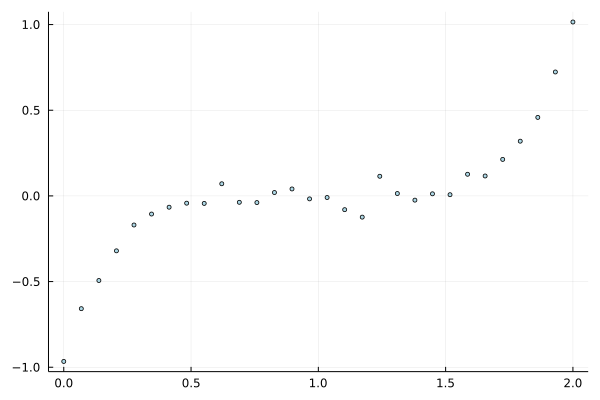

In [278]:
using Plots
using Random
using LinearAlgebra

Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 2, length=n)

f(x) = (x-1)^5

y = f.(x) + randn(n)*0.05 #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)

Após, podemos utilizar a função vandermon abaixo para montar a matriz de Vandermon necessária para realizar o cálculo a depender do grau da função.


In [279]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

Com isto, podemos aplicar a regressão para resolver o sistema e nos dar uma aproximação da função variando do grau $0$ até $29$.

In [280]:
function regressao(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c, grau
end

regressao (generic function with 1 method)

Criaremos também a função plota_regressao para plotar todas as aproxima

In [281]:
using Polynomials
using Plots

In [282]:
function plota_regressao(regressao, grau)
    coefs = Float64[]
    p = Any[]
    for i=1:grau+1 #linhas
        push!(coefs, regressao[i])
        p = Polynomial(coefs)
    end
    return p
end

plota_regressao (generic function with 1 method)

Com isto, podemos plotar uma aproximação da função em qualquer grau.

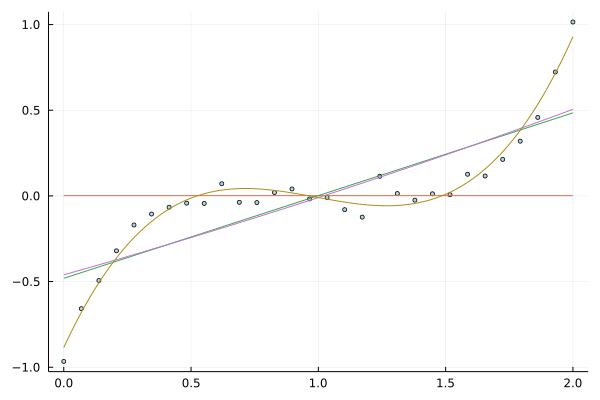

In [283]:
c, grau = regressao(x,y,0)
p0 = plota_regressao(c, 0)

c, grau = regressao(x,y,1)
p1 = plota_regressao(c, 1)

c, grau = regressao(x,y,2)
p2 = plota_regressao(c, 2)

c, grau = regressao(x,y,3)
p3 = plota_regressao(c, 3)


scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p0, 0, 2)
plot!(p1, 0, 2)
plot!(p2, 0, 2)
plot!(p3, 0, 2)

Com isto, podemos fazer o experimento de fazer uma regressão de grau 29 e maior que 29.

-0.966045 + 22904.9*x - 1.07657e6*x^2 + 2.15755e7*x^3 - 2.49576e8*x^4 + 1.89205e9*x^5 - 1.00769e10*x^6 + 3.9324e10*x^7 - 1.15327e11*x^8 + 2.57301e11*x^9 - 4.35642e11*x^10 + 5.44716e11*x^11 - 4.57222e11*x^12 + 1.51914e11*x^13 + 2.18325e11*x^14 - 4.32911e11*x^15 + 3.97364e11*x^16 - 2.1054e11*x^17 + 4.02179e10*x^18 + 3.07683e10*x^19 - 2.84254e10*x^20 + 9.33793e9*x^21 - 3.05057e8*x^22 - 3.52482e8*x^23 - 4.39662e8*x^24 + 4.69456e8*x^25 - 2.01344e8*x^26 + 4.78796e7*x^27 - 6.26168e6*x^28 + 3.55004e5*x^29


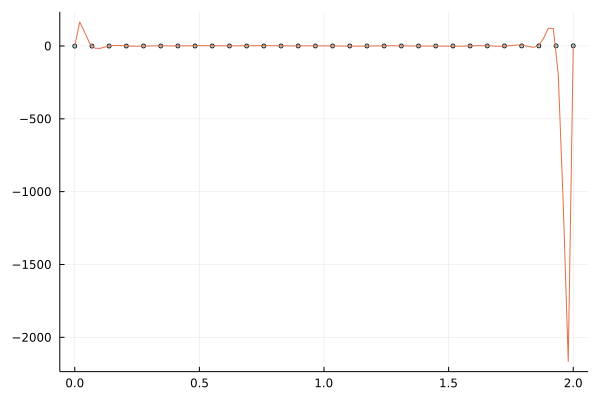

In [306]:
c, grau = regressao(x,y,29)
p29 = plota_regressao(c, 29)

scatter(x, y, c=:lightblue, ms=3, leg=false)
println(p29)
plot!(p29, 0, 2)

No primeiro caso, para a interpolação de grau 29, deveríamos observar uma função passando exatamente por todos os pontos. Porém, por problemas de precisão por ser um polinômio muito grande, podemos observar distorçoes no gráfico conforme nos aproximamos de 29.

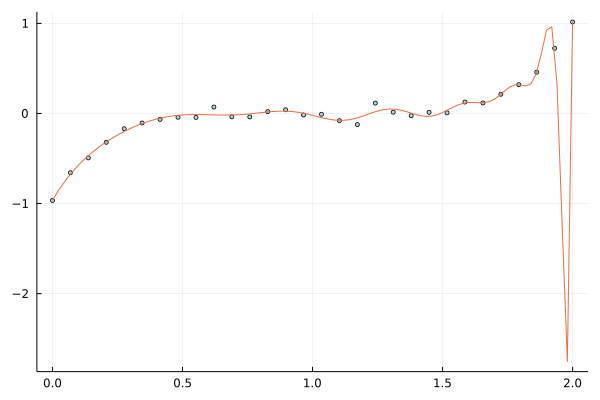

In [299]:
c, grau = regressao(x,y,35)
p35 = plota_regressao(c, 35)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p35, 0, 2)

Para graus maiores que 29, podemos continuar realizando a interpolação, apesar das distorções. Neste caso, porém, podemos observar que começaremos a ter valores dos pontos iniciais que não estão presentes com exatidão na função. Isto é, quando temos grau 29, todas as equações são satisfeitas. Após isto, começaremos a ter equações que deixarão de ser satisfeitas, voltando a aumentar nosso erro na função.

Podemos então, por fim, utilizar a função erro_total e erro_modelos para plotar o gráfico do erro total da função por grau

In [290]:
println(p29(1))

0.9273968479281105


In [232]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)  
end

erro_total (generic function with 1 method)

In [231]:
function erro_modelos(grau, modelos)
    erros = Any[]
    for i=0:grau
        push!(erros, erro_total(x,y,modelos[i+1]))
    end
    return erros
end

erro_modelos (generic function with 1 method)

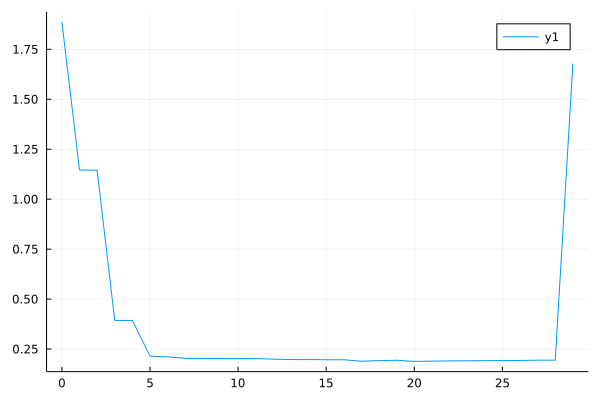

In [268]:
modelos = Any[]

n = 30
x = range(0, 2, length=n)
f(x) = (x-1)^5
y = f.(x) + randn(n)*0.05 #ruído

for i=0:29
    c, grau = regressao(x,y,i)
    pn = plota_regressao(c, i)
    push!(modelos, pn)
end

y = erro_modelos(29, modelos)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]

plot(x, y)

# Exercício 1.3)

Para este exercício, devemos ser capazes de, utilizando as técnicas de minímos quadrados apresentadas em aula, classificar o filme preferido da turma na pesquisa realizada. Essa pesquisa foi classificada colocando-se a escolha dos filmes uns contra outros. Nesta pesquisa, foi obtido o seguinte resultado:

#### Toy story 12 x 1 Rocky
#### De Volta Pro Futuro 8 x 5 Curtindo a Vida Adoidado
#### Os Incríveis 10 x 3 Duna
#### Batman Begins 7 x 5 Harry Potter 1
#### Shrek 11 x 2 Duna
#### Harry Potter 10 x 3 Rocky
#### Toy Story 9 x 4 De Volta Para o Futuro
#### Os Incríveis 9 x 4 Harry potter 1
#### Curtindo a Vida Adoidado 7 x 5 Duna
#### De Volta Para o Futuro 7 x 5 Duna
#### Shrek 12 x 1 Rocky
#### Os Incríveis 9 x 4 Batman Begins
#### Toy Story 8 x 5 Batman Begins
#### Os Incríveis 10 x 3 Curtindo a vida adoidado

Com isto, podemos mapear a relação entre cada um dos filmes. Para nos auxiliarmos, utilizaremos uma estrutura em grafo para melhor visualização.

![alt text](filmes.png "Filmes")

##### Toy Story = A
##### Rocky = B
##### De Volta Pro Futuro = C
##### Curtindo a Vida Adoidado = D
##### Os Incríveis = E
##### Duna = F
##### Batman Begins = G
##### Harry Potter e a Pedra Filosofal = H
##### Shrek = I

Com isto, analisando o grafo, temos que as seguintes equações relacionandos os filmes

$$
\begin{cases}
H - B = 7 \\
A - B = 11 \\
I - B = 11 \\
I - F = 9 \\
C - F = 2 \\
A - C = 5 \\
A - G = 3 \\
E - G = 5 \\
E - F = 7 \\
D - F = 2 \\
C - D = 3 \\
E - D = 7 \\
E - H = 5 \\
G - H = 2 \\
\end{cases}
$$

Assim, podemos montar as matrizes características do sistema, tal que

$$
V = \begin{bmatrix}
0 & -1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & -1 & 0 & 0 & 0 \\
1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & -1 & 0 & 0 & 0 \\
0 & 0 & 1 & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 \\
\end{bmatrix}
$$

$$
y = \begin{bmatrix}
A \\
B \\
C \\
D \\
E \\
F \\
G \\
H \\
I \\
\end{bmatrix}
$$

$$
C = \begin{bmatrix}
7 \\
11 \\
11 \\
9 \\
2 \\
5 \\
3 \\
5 \\
7 \\
2 \\
3 \\
7 \\
5 \\
2 \\
\end{bmatrix}
$$

Com o sistema em mãos, podemos então utilizar a função calcular_filme_preferido() para resolver o sistema e calcular a pontuação de cada filme na pesquisa obtida

In [24]:
function calcular_filme_preferido()
    A = [0 -1 0 0 0 0 0 1 0; 1 -1 0 0 0 0 0 0 0; 0 -1 0 0 0 0 0 0 1; 0 0 0 0 0 -1 0 0 1; 0 0 1 0 0 -1 0 0 0; 1 0 -1 0 0 0 0 0 0; 1 0 0 0 0 0 -1 0 0; 0 0 0 0 1 0 -1 0 0; 0 0 0 0 1 -1 0 0 0; 0 0 0 1 0 -1 0 0 0; 0 0 1 -1 0 0 0 0 0; 0 0 0 -1 1 0 0 0 0; 0 0 0 0 1 0 0 -1 0; 0 0 0 0 0 0 1 -1 0]
    b = [7;11;11;9;2;5;3;5;7;2;3;7;5;2]
    x=A\b
    return x
end

calcular_filme_preferido (generic function with 1 method)

In [26]:
calcular_filme_preferido()

9-element Array{Float64,1}:
  4.043568212242912
 -6.898381404405505
 -0.6420834854569792
 -2.519410977242302
  4.534258245101618
 -3.4504076913715456
  0.6711695265912145
 -0.5643178775708901
  4.825605452111477

Com isto, concluímos que o filme I ( Shrek ) foi o filme preferido na pesquisa feita com os alunos.

# Exercício 1.4)

Neste exercício, devemos, dada um conjunto de pesos representando a pesagem no dia medido, estipular uma aproximação pro dia que será pesado na contagem o valor $110$. Temos que foram medidas as seguintes pesagens nos dias

| Dia | Peso |
| --- | ---- |
26/10 |	120,6
27/10 |	121,6
28/10 |	120,8
29/10 |	121,4
30/10 |	121,1
5/11 |	121,1
6/11 |	120,4
7/11 |	120,3
8/11 |	120,8
9/11 |	120,6
10/11 |	119,6
11/11 |	119,8
12/11 |	118,7
13/11 |	120,5
14/11 |	120,1
15/11 |	120,2
16/11 |	120,7
17/11 |	121,7
18/11 |	120,7
19/11 |	120,7
20/11 |	120,3
21/11 |	119,4
22/11 |	119,1
23/11 |	120,2
24/11 |	120,7
25/11 |	120,1
26/11 |	119,7
27/11 |	119,2
28/11 |	119,4
29/11 |	119,5
30/11 |	119
1/12 |	118,9
2/12 |	118,7
3/12 |	118,3
4/12 |	118,5
5/12 |	118,6
6/12 |	118,8
7/12 |	118,5
8/12 |	118,3
9/12 |	117,8
10/12 |	118
13/12 |	119
15/12 |	118,4
17/12 |	116,9
18/12 |	117,5
19/12 |	117,4
20/12 |	117,6
21/12 |	118,1
22/12 |	117,3
23/12 |	117,6
24/12 |	117,7
25/12 |	117,6
26/12 |	117,3
27/12 |	118
28/12 |	117,8
29/12 |	117,5
4/1 |	119
5/1 |	117,6
6/1 |	116,8
7/1 |	116,6
8/1 |	116,9
10/1 |	116,1
11/1 |	116,1
12/1 |	115,8
13/1 |	115,6
14/1 |	116
15/1 |	115,4
16/1 |	115,5
17/1 |	115,3

Utilizando o trecho de código abaixo, podemos realizar a plotagem dos pontos dessa pesagem

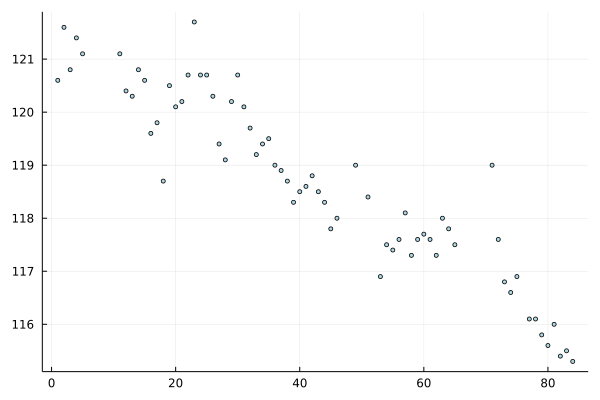

In [45]:
n = 69
x = [1,2,3,4,5,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49,51,53,54,55,56,57,58,59,60,61,62,63,64,65,71,72,73,74,75,77,78,79,80,81,82,83,84]
y = [120.6,121.6,120.8,121.4,121.1,121.1,120.4,120.3,120.8,120.6,119.6,119.8,118.7,120.5,120.1,120.2,120.7,121.7,120.7,120.7,120.3,119.4,119.1,120.2,120.7,120.1,119.7,119.2,119.4,119.5,119,118.9,118.7,118.3,118.5,118.6,118.8,118.5,118.3,117.8,118,119,118.4,116.9,117.5,117.4,117.6,118.1,117.3,117.6,117.7,117.6,117.3,118,117.8,117.5,119,117.6,116.8,116.6,116.9,116.1,116.1,115.8,115.6,116,115.4,115.5,115.3]
scatter(x, y, c=:lightblue, ms=3, leg=false)

Podemos então utilizar as funções já produzidas vandermonde, regressao e plota_regressão para realizar resolver o sistema proposto. Abaixo, será realizado o cálculo da regressão até o grau 6 e, em seguida, calculado o erro das regressões para que possamos escolher algum dos casos.

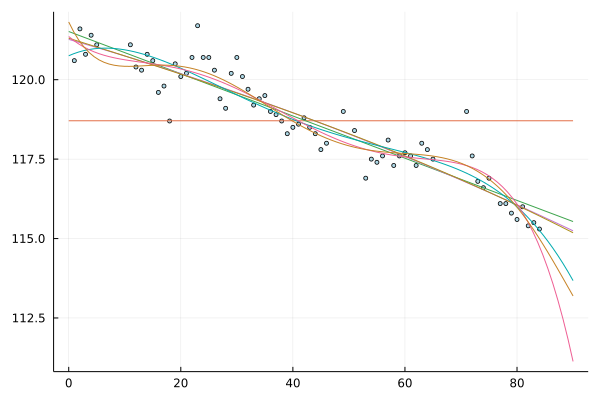

In [54]:
c, grau = regressao(x,y,0)
p0 = plota_regressao(c, 0)

c, grau = regressao(x,y,1)
p1 = plota_regressao(c, 1)

c, grau = regressao(x,y,2)
p2 = plota_regressao(c, 2)

c, grau = regressao(x,y,3)
p3 = plota_regressao(c, 3)

c, grau = regressao(x,y,4)
p4 = plota_regressao(c, 4)

c, grau = regressao(x,y,5)
p5 = plota_regressao(c, 5)

c, grau = regressao(x,y,6)
p6 = plota_regressao(c, 6)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p0, 0, 90)
plot!(p1, 0, 90)
plot!(p2, 0, 90)
plot!(p3, 0, 90)
plot!(p4, 0, 90)
plot!(p5, 0, 90)
plot!(p6, 0, 90)

In [58]:
println(erro_total(x,y,p0))
println(erro_total(x,y,p1))
println(erro_total(x,y,p2))
println(erro_total(x,y,p3))
println(erro_total(x,y,p4))
println(erro_total(x,y,p5))
println(erro_total(x,y,p6))

14.03945785319342
5.049197780093408
4.982549448045695
4.981346276253118
4.729552966968572
4.4721635735953456
4.394814445597018


Como, a partir de $p1$, começou-se a ter uma perda mínima no erro, utilizaremos este para nos dar uma aproximação. Assim, querermos achar um $x$ tal que $f(x) = 110$.

In [129]:
for i=160:200
    println("p1(",i,"): ",p1(i))
end

p1(160): 110.88191301758539
p1(161): 110.81544151668835
p1(162): 110.74897001579131
p1(163): 110.68249851489428
p1(164): 110.61602701399725
p1(165): 110.54955551310022
p1(166): 110.48308401220318
p1(167): 110.41661251130614
p1(168): 110.35014101040912
p1(169): 110.28366950951208
p1(170): 110.21719800861504
p1(171): 110.150726507718
p1(172): 110.08425500682097
p1(173): 110.01778350592394
p1(174): 109.9513120050269
p1(175): 109.88484050412987
p1(176): 109.81836900323283
p1(177): 109.75189750233581
p1(178): 109.68542600143877
p1(179): 109.61895450054173
p1(180): 109.5524829996447
p1(181): 109.48601149874767
p1(182): 109.41953999785063
p1(183): 109.3530684969536
p1(184): 109.28659699605656
p1(185): 109.22012549515954
p1(186): 109.1536539942625
p1(187): 109.08718249336546
p1(188): 109.02071099246842
p1(189): 108.95423949157139
p1(190): 108.88776799067436
p1(191): 108.82129648977732
p1(192): 108.75482498888029
p1(193): 108.68835348798325
p1(194): 108.62188198708623
p1(195): 108.5554104861891

Assim, temos, aproximadamente, que o peso será de 110kg será em $x = 173$, ou seja, em 16/04.

# Exercício 1.5)

Para este exercício, devemos descobrir o horário ou uma interpolação do horário em que houve um assassinato. De acordo com a descrição, as temperaturas registradas foram

#### 15h00: 34ºC
#### 16h30: 30ºC
#### 17h30: 25ºC

Seguindo a Lei do Resfriamento de Newton, teremos que a temperatura do corpo varia conforme:

$F(x) = ( Ti - Tf) e^{-kx} + Tf$

sendo a temperatura inicial $Ti = 37$, a temperatura final $Tf = 25$. Com isto, teremos que resolver o sistema não-linear para encontrar o coeficiente $k$ e determinarmos uma função que encontre a hora do assassinato.

Podemos então utilizar a função calcula_assassinato em conjunto com as funções regressão e vandermonde para resolver o sistema não-linear fazendo a transformação do sistema utilizando $log$ e nos devolvendo os coeficientes da função.

In [197]:
function calcula_assassinato(x, y)
    x_barra=x
    y_barra=log.(y)
    V=vandermonde(x_barra,y_barra,1)
    coefs=regressao(x_barra,y_barra,1)
    return coefs
end


calcula_assassinato (generic function with 1 method)

Com isto, podemos então utilizar os pontos de tempo x temperatura medidos para montarmos o sistema e procurar os coeficientes que representam a função esperada.

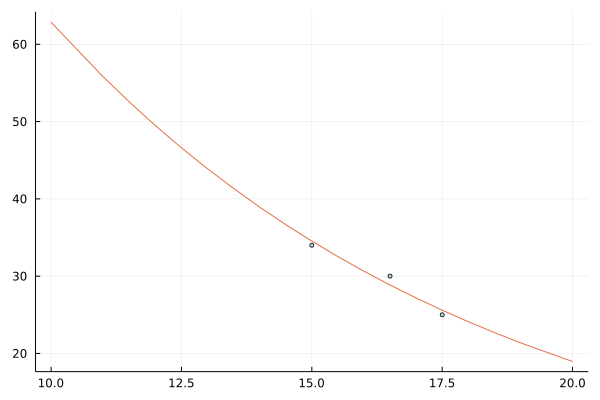

In [201]:

x = [15,16.5,17.5]
y = [34,30,25]

coefs, _ = calcula_assassinato(x,y)
c1=exp(coefs[1])
c2=coefs[2]
f(x) = (37 - 25)*e^(-kx) + 25
assassinato(x)=c1*exp(c2*x) #modelo exponecial
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(assassinato,10,20)

Com a função que representa o assassinato, podemos então utilizar o método de Newton para nos auxiliar a encontrar o valor esperado (37°C) na função. Com isto, podemos utilizar a função $f(x) = c1*e^{c2*x} - 37$ e sua derivada.

In [199]:
function newton_assassinato(iteracoes, chute) # Número de iterações e chute inicial
    for i=1:iteracoes
        chute = chute - (c1*(exp(c2*chute)) - 37)/(((c2*c1)*exp((c2*chute)))) # Chute - f(chute)/f'(chute)
    end
    return chute # Aproximação do resultado. Quanto mais iterações, maior a precisão.
end

newton_assassinato (generic function with 1 method)

In [200]:
newton_assassinato(30, 14)

14.424843136955248

Com isto, temos que o horário do assassinato corresponde a $14.424843136955248$, ou seja, aproximadamente às $14h25$.